<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercise-1.1" data-toc-modified-id="Exercise-1.1-1">Exercise 1.1</a></span></li><li><span><a href="#Exercise-1.2" data-toc-modified-id="Exercise-1.2-2">Exercise 1.2</a></span></li><li><span><a href="#Exercise-1.3" data-toc-modified-id="Exercise-1.3-3">Exercise 1.3</a></span></li><li><span><a href="#Exercise-1.4" data-toc-modified-id="Exercise-1.4-4">Exercise 1.4</a></span></li><li><span><a href="#Exercise-2.1" data-toc-modified-id="Exercise-2.1-5">Exercise 2.1</a></span></li><li><span><a href="#Exercise-2.2" data-toc-modified-id="Exercise-2.2-6">Exercise 2.2</a></span></li><li><span><a href="#Exercise-2.3" data-toc-modified-id="Exercise-2.3-7">Exercise 2.3</a></span></li><li><span><a href="#Exercise-2.4" data-toc-modified-id="Exercise-2.4-8">Exercise 2.4</a></span></li><li><span><a href="#Exercise-2.5" data-toc-modified-id="Exercise-2.5-9">Exercise 2.5</a></span></li></ul></div>

# Exercise 1.1

In [1]:
import pandas as pd

# Import built-in libraries 'string' and 'random' 
import random
import string

# Get upper- and lowercase letters from 'string' library
lower = string.ascii_lowercase
upper = string.ascii_uppercase

# Create a dictionary with dummy data of integers and letters
d = {'Integers': [random.randint(1, 100) for i in range(1, 100)],
     'Lowercase': [random.choice(lower) for i in range(1, 100)],
     'Uppercase': [random.choice(upper) for i in range(1, 100)]}

# Create dataframe from dictionary
df = pd.DataFrame(d)

# df  # <- This would print all 100 rows

# Exercise 1.2

In [2]:
df.head(3)

,Integers,Lowercase,Uppercase
0,59,z,D
1,40,x,P
2,2,t,E


In [3]:
df.tail(4)

,Integers,Lowercase,Uppercase
95,62,n,V
96,43,g,G
97,16,n,C
98,7,v,K


# Exercise 1.3

In [4]:
dfk = df[df['Uppercase'] == 'K']
dfk.head()

,Integers,Lowercase,Uppercase
41,75,v,K
98,7,v,K


# Exercise 1.4

In [5]:
dfk = dfk.reset_index(drop=True)
dfk

,Integers,Lowercase,Uppercase
0,75,v,K
1,7,v,K


# Exercise 2.1

In [27]:
# Import csv file to dataframe
dfr = pd.read_csv('shear_key_forces.csv')
dfr.head()

,LC,LC-title,Element_no,P[kN],Shear_key
0,4033,Shear keys - W - 2553/2554,10100001,0.1,Shear_key20
1,4033,Shear keys - W - 2553/2554,10100002,0.1,Shear_key20
2,4033,Shear keys - W - 2553/2554,10100003,0.0,Shear_key20
3,4033,Shear keys - W - 2553/2554,10100004,-0.1,Shear_key19
4,4033,Shear keys - W - 2553/2554,10100005,0.0,Shear_key19


# Exercise 2.2

In [28]:
# Filer dataframe to contain only shear keys 
dfr = dfr[dfr['Shear_key'] != 'Not_a_shear_key']
dfr.head()

,LC,LC-title,Element_no,P[kN],Shear_key
0,4033,Shear keys - W - 2553/2554,10100001,0.1,Shear_key20
1,4033,Shear keys - W - 2553/2554,10100002,0.1,Shear_key20
2,4033,Shear keys - W - 2553/2554,10100003,0.0,Shear_key20
3,4033,Shear keys - W - 2553/2554,10100004,-0.1,Shear_key19
4,4033,Shear keys - W - 2553/2554,10100005,0.0,Shear_key19


# Exercise 2.3

In [29]:
dfr = dfr.drop('Element_no', axis=1)
dfr.head()

,LC,LC-title,P[kN],Shear_key
0,4033,Shear keys - W - 2553/2554,0.1,Shear_key20
1,4033,Shear keys - W - 2553/2554,0.1,Shear_key20
2,4033,Shear keys - W - 2553/2554,0.0,Shear_key20
3,4033,Shear keys - W - 2553/2554,-0.1,Shear_key19
4,4033,Shear keys - W - 2553/2554,0.0,Shear_key19


# Exercise 2.4

In [30]:
# Create groupby object and perform sum operation on it
dfr_sum = dfr.groupby(['Shear_key', 'LC', 'LC-title'], as_index=False).sum()
dfr_sum.head()

,Shear_key,LC,LC-title,P[kN]
0,Shear_key1,4043,Shear keys - W - remaining,0.0
1,Shear_key1,4044,Top slab- beam shear keys activa,-284.1
2,Shear_key1,4045,Protection concrete,-300.6
3,Shear_key1,4046,Backfill,-855.8
4,Shear_key1,4047,Ballast concrete of 16.8,-900.3


The list of column labels `['Shear_key', 'LC', 'LC-title']` are the columns that are to be present in the resulting dataframe. The parameter `as_index` is by default `True`, which would create a multiindex out of all the column labels listed. By setting `as_index=False`, we reset to 0-indexing. 

# Exercise 2.5

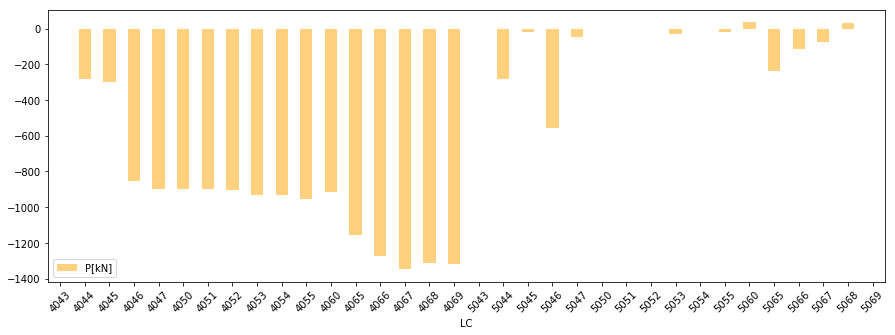

In [35]:
# Filter for shear key 1
df_key1 = dfr_sum[dfr_sum['Shear_key'] == 'Shear_key1']

# Use built-in pandas plot
df_key1.plot(kind='bar', x='LC', y='P[kN]', rot=45, figsize=(15, 5), color='orange', alpha=0.50)

**Note:** The same plot could be constructed by extracting arrays in columns `'LC'` and `'P[kN]'` to variables and using `matplotlib` itself as `plt.bar(...)`. To do that, you would have to import `matplotlib.pyplot as plt`.
`pandas` just provides a shortcut to get a fast graph out.